In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.utils import np_utils
np.random.seed(10)
from keras.datasets import mnist

from keras.models import Sequential

from keras.layers import Dropout
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K
from keras import objectives
from keras.datasets import mnist
from keras.utils.vis_utils import plot_model
import keras

In [21]:
def recategorize(data,columnname):
    
    counts = data[columnname].value_counts()
    nameSet = set(counts[counts>= 0.01*len(data.index)].index.values)
    
    data.loc[:,columnname] = data[columnname].apply(lambda x:'OTHER'if x not in nameSet else x)
    return data

In [22]:
data = pd.read_csv("training.csv")

print(len(data.index)) # number of data (cars)

data.info()
#如果有一個missing 則去掉此物件
data2 = data.dropna(axis =0, how = 'any', subset = ['Color',
                                                    'Transmission',
                                                    'Nationality',
                                                    'Size',
                                                    'TopThreeAmericanName',
                                                    'MMRAcquisitionAuctionAveragePrice',
                                                    'MMRAcquisitionAuctionCleanPrice',
                                                    'MMRAcquisitionRetailAveragePrice',
                                                    'MMRAcquisitonRetailCleanPrice',
                                                    'MMRCurrentAuctionAveragePrice',
                                                    'MMRCurrentAuctionCleanPrice',
                                                    'MMRCurrentRetailAveragePrice',
                                                    'MMRCurrentRetailCleanPrice'])

72983
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nati

In [23]:
data2['MMRAcquisitionAuctionAveragePrice'] = pd.to_numeric(data2['MMRAcquisitionAuctionAveragePrice'])

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72658 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72658 non-null int64
IsBadBuy                             72658 non-null int64
PurchDate                            72658 non-null object
Auction                              72658 non-null object
VehYear                              72658 non-null int64
VehicleAge                           72658 non-null int64
Make                                 72658 non-null object
Model                                72658 non-null object
Trim                                 70301 non-null object
SubModel                             72658 non-null object
Color                                72658 non-null object
Transmission                         72658 non-null object
WheelTypeID                          69499 non-null float64
WheelType                            69494 non-null object
VehOdo                               72658 non-null int64
Nationalit

In [48]:
for i in range(len(data2.columns)):
    data2 = recategorize(data2, str(data2.columns[i]))

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [49]:
data2_cleaned = data2.drop(["RefId","PurchDate","VehYear","WheelTypeID","BYRNO","VNZIP1","PRIMEUNIT","AUCGUART","Trim"],axis=1)

In [50]:
data2_cleaned

,IsBadBuy,Auction,VehicleAge,Make,Model,SubModel,Color,Transmission,WheelType,VehOdo,...,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,ADESA,3,MAZDA,OTHER,OTHER,RED,AUTO,Alloy,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,OTHER
1,0,ADESA,5,DODGE,1500 RAM PICKUP 2WD,OTHER,WHITE,AUTO,Alloy,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,OTHER
2,0,ADESA,4,DODGE,OTHER,4D SEDAN SXT FFV,MAROON,AUTO,Covers,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,1389
3,0,ADESA,5,DODGE,OTHER,4D SEDAN,SILVER,AUTO,Alloy,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,OTHER
4,0,ADESA,4,FORD,FOCUS,OTHER,SILVER,MANUAL,Covers,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,1020
5,0,ADESA,5,MITSUBISHI,OTHER,OTHER,WHITE,AUTO,Covers,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,594
6,0,ADESA,5,KIA,OTHER,4D SEDAN EX,BLACK,AUTO,Covers,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,533
7,0,ADESA,4,FORD,TAURUS,4D SEDAN SE,WHITE,AUTO,Covers,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,825
8,0,ADESA,2,KIA,OTHER,4D SEDAN EX,BLACK,AUTO,Covers,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,482
9,0,ADESA,2,FORD,OTHER,4D SEDAN SEL,RED,AUTO,Alloy,OTHER,...,OTHER,OTHER,OTHER,OTHER,OTHER,OTHER,FL,OTHER,0,1633


In [51]:
data2_cleaned1 = data2_cleaned[:70000]
dataFinal = pd.get_dummies(data2_cleaned1)
len(list(dataFinal))
dataFinal.head()
Y = dataFinal.loc[:,"IsBadBuy"]
X = dataFinal.drop("IsBadBuy",1)
#X.head()
dataFinal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 70308
Columns: 166 entries, IsBadBuy to WarrantyCost_OTHER
dtypes: int64(2), uint8(164)
memory usage: 12.6 MB


In [47]:
X.shape

(70000, 165)

In [29]:
from sklearn.preprocessing import StandardScaler as SC
sc = SC()
Xnew = sc.fit_transform(X)
X = np.array(X)
Y = np.array(Y)
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
X_train_ori, X_test_ori, Y_train_ori, Y_test_ori = train_test_split(X, Y)
X_train, X_test, Y_train, Y_test = train_test_split(Xnew, Y)


Y_train_ori_onehot = np_utils.to_categorical(Y_train_ori)
Y_test_ori_onehot = np_utils.to_categorical(Y_test_ori)
#Y_train_onehot = np_utils.to_categorical(Y_train)
#Y_test_onehot = np_utils.to_categorical(Y_test)


In [30]:
X_train_ori.shape

(52500, 165)

In [193]:
batch_size = 500
original_dim = 165
latent_dim = 2
intermediate_dim = 800
nb_epoch = 4500
epsilon_std = 1.0

In [194]:
def sampling(args): 
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0.,stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon


#my tips:loss(restruct X)+KL
def vae_loss(x, x_decoded_mean):
    #my tips:logloss
    xent_loss = original_dim * objectives.binary_crossentropy(x, x_decoded_mean)
    #my tips:see paper's appendix B
    kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return xent_loss + kl_loss

In [ ]:
x = Input(batch_shape=(batch_size, original_dim))
h = Dense(intermediate_dim, activation='relu')(x)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

# note that "output_shape" isn't necessary with the TensorFlow backend
# my tips:get sample z(encoded)
z = Lambda(sampling,output_shape=(latent_dim,))([z_mean, z_log_var])
 
# we instantiate these layers separately so as to reuse them later
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

#This model will include all layers required in the computation of x given x_decoded_mean.
vae = Model(x, x_decoded_mean)
adam = keras.optimizers.Adam(lr=0.0001, beta_1=0.99, beta_2=0.999, amsgrad=False)
vae.compile(optimizer=adam, loss=vae_loss)


# train the VAE on MNIST digits
vae.fit(x=X_train_ori,
        y=X_train_ori,
        epochs=nb_epoch,
        batch_size=batch_size,
        verbose=2,
        validation_data=(X_test_ori, X_test_ori))

Train on 52500 samples, validate on 17500 samples
Epoch 1/4500
 - 6s - loss: 97.9819 - val_loss: 78.0315
Epoch 2/4500
 - 3s - loss: 63.6322 - val_loss: 52.3117
Epoch 3/4500
 - 3s - loss: 44.9785 - val_loss: 39.8294
Epoch 4/4500
 - 3s - loss: 37.3910 - val_loss: 35.9372
Epoch 5/4500
 - 3s - loss: 35.2087 - val_loss: 34.6930
Epoch 6/4500
 - 3s - loss: 34.2498 - val_loss: 33.9830
Epoch 7/4500
 - 4s - loss: 33.7185 - val_loss: 33.5972
Epoch 8/4500
 - 4s - loss: 33.3903 - val_loss: 33.3319
Epoch 9/4500
 - 4s - loss: 33.1539 - val_loss: 33.0928
Epoch 10/4500
 - 4s - loss: 32.9404 - val_loss: 32.8607
Epoch 11/4500
 - 4s - loss: 32.6489 - val_loss: 32.5028
Epoch 12/4500
 - 4s - loss: 32.2174 - val_loss: 31.9804
Epoch 13/4500
 - 4s - loss: 31.6564 - val_loss: 31.3711
Epoch 14/4500
 - 4s - loss: 31.0310 - val_loss: 30.8145
Epoch 15/4500
 - 5s - loss: 30.4916 - val_loss: 30.3317
Epoch 16/4500
 - 4s - loss: 30.0684 - val_loss: 29.9395
Epoch 17/4500
 - 4s - loss: 29.7293 - val_loss: 29.6266
Epoch 1

Epoch 146/4500
 - 4s - loss: 23.5883 - val_loss: 23.6649
Epoch 147/4500
 - 4s - loss: 23.5652 - val_loss: 23.6649
Epoch 148/4500
 - 4s - loss: 23.5464 - val_loss: 23.6527
Epoch 149/4500
 - 4s - loss: 23.5337 - val_loss: 23.6204
Epoch 150/4500
 - 4s - loss: 23.5467 - val_loss: 23.6120
Epoch 151/4500
 - 4s - loss: 23.5212 - val_loss: 23.5898
Epoch 152/4500
 - 4s - loss: 23.5235 - val_loss: 23.6056
Epoch 153/4500
 - 4s - loss: 23.5061 - val_loss: 23.5866
Epoch 154/4500
 - 4s - loss: 23.4912 - val_loss: 23.5903
Epoch 155/4500
 - 4s - loss: 23.4786 - val_loss: 23.5737
Epoch 156/4500
 - 4s - loss: 23.4637 - val_loss: 23.5489
Epoch 157/4500
 - 4s - loss: 23.4514 - val_loss: 23.5525
Epoch 158/4500
 - 4s - loss: 23.4410 - val_loss: 23.5405
Epoch 159/4500
 - 4s - loss: 23.4380 - val_loss: 23.5121
Epoch 160/4500
 - 4s - loss: 23.4251 - val_loss: 23.5026
Epoch 161/4500
 - 4s - loss: 23.4227 - val_loss: 23.4927
Epoch 162/4500
 - 4s - loss: 23.4022 - val_loss: 23.5024
Epoch 163/4500
 - 4s - loss: 23

Epoch 290/4500
 - 4s - loss: 22.5671 - val_loss: 22.6605
Epoch 291/4500
 - 4s - loss: 22.5603 - val_loss: 22.6832
Epoch 292/4500
 - 4s - loss: 22.5533 - val_loss: 22.6710
Epoch 293/4500
 - 4s - loss: 22.5656 - val_loss: 22.6461
Epoch 294/4500
 - 4s - loss: 22.5404 - val_loss: 22.6619
Epoch 295/4500
 - 4s - loss: 22.5489 - val_loss: 22.6469
Epoch 296/4500
 - 4s - loss: 22.5275 - val_loss: 22.6394
Epoch 297/4500
 - 4s - loss: 22.5212 - val_loss: 22.6430
Epoch 298/4500
 - 4s - loss: 22.5258 - val_loss: 22.6209
Epoch 299/4500
 - 4s - loss: 22.5256 - val_loss: 22.6058
Epoch 300/4500
 - 4s - loss: 22.5136 - val_loss: 22.6019
Epoch 301/4500
 - 4s - loss: 22.5160 - val_loss: 22.6222
Epoch 302/4500
 - 4s - loss: 22.5080 - val_loss: 22.6174
Epoch 303/4500
 - 4s - loss: 22.5097 - val_loss: 22.5994
Epoch 304/4500
 - 4s - loss: 22.5059 - val_loss: 22.6158
Epoch 305/4500
 - 4s - loss: 22.5065 - val_loss: 22.6153
Epoch 306/4500
 - 4s - loss: 22.4985 - val_loss: 22.6106
Epoch 307/4500
 - 4s - loss: 22

Epoch 434/4500
 - 4s - loss: 22.1345 - val_loss: 22.2422
Epoch 435/4500
 - 4s - loss: 22.1228 - val_loss: 22.2217
Epoch 436/4500
 - 4s - loss: 22.1212 - val_loss: 22.2370
Epoch 437/4500
 - 4s - loss: 22.1225 - val_loss: 22.2380
Epoch 438/4500
 - 4s - loss: 22.1153 - val_loss: 22.2417
Epoch 439/4500
 - 4s - loss: 22.1157 - val_loss: 22.2361
Epoch 440/4500
 - 4s - loss: 22.1120 - val_loss: 22.2288
Epoch 441/4500
 - 4s - loss: 22.1145 - val_loss: 22.2240
Epoch 442/4500
 - 4s - loss: 22.1148 - val_loss: 22.2171
Epoch 443/4500
 - 4s - loss: 22.1018 - val_loss: 22.2135
Epoch 444/4500
 - 4s - loss: 22.1041 - val_loss: 22.2179
Epoch 445/4500
 - 4s - loss: 22.0973 - val_loss: 22.2335
Epoch 446/4500
 - 4s - loss: 22.0932 - val_loss: 22.2020
Epoch 447/4500
 - 4s - loss: 22.0999 - val_loss: 22.2197
Epoch 448/4500
 - 4s - loss: 22.0954 - val_loss: 22.2020
Epoch 449/4500
 - 4s - loss: 22.0930 - val_loss: 22.2124
Epoch 450/4500
 - 4s - loss: 22.1004 - val_loss: 22.2078
Epoch 451/4500
 - 4s - loss: 22

Epoch 578/4500
 - 4s - loss: 21.8661 - val_loss: 22.0035
Epoch 579/4500
 - 4s - loss: 21.8548 - val_loss: 21.9639
Epoch 580/4500
 - 4s - loss: 21.8595 - val_loss: 22.0011
Epoch 581/4500
 - 4s - loss: 21.8659 - val_loss: 21.9910
Epoch 582/4500
 - 4s - loss: 21.8569 - val_loss: 21.9988
Epoch 583/4500
 - 4s - loss: 21.8704 - val_loss: 22.0122
Epoch 584/4500
 - 4s - loss: 21.8546 - val_loss: 21.9958
Epoch 585/4500
 - 4s - loss: 21.8585 - val_loss: 21.9733
Epoch 586/4500
 - 4s - loss: 21.8516 - val_loss: 21.9866
Epoch 587/4500
 - 4s - loss: 21.8541 - val_loss: 21.9735
Epoch 588/4500
 - 4s - loss: 21.8649 - val_loss: 22.0000
Epoch 589/4500
 - 4s - loss: 21.8478 - val_loss: 21.9881
Epoch 590/4500
 - 4s - loss: 21.8476 - val_loss: 21.9715
Epoch 591/4500
 - 4s - loss: 21.8422 - val_loss: 21.9840
Epoch 592/4500
 - 4s - loss: 21.8417 - val_loss: 21.9742
Epoch 593/4500
 - 4s - loss: 21.8364 - val_loss: 21.9709
Epoch 594/4500
 - 4s - loss: 21.8542 - val_loss: 21.9597
Epoch 595/4500
 - 4s - loss: 21

Epoch 722/4500
 - 4s - loss: 21.6653 - val_loss: 21.7949
Epoch 723/4500
 - 4s - loss: 21.6860 - val_loss: 21.8312
Epoch 724/4500
 - 4s - loss: 21.6701 - val_loss: 21.8184
Epoch 725/4500
 - 4s - loss: 21.6696 - val_loss: 21.8334
Epoch 726/4500
 - 4s - loss: 21.6741 - val_loss: 21.8082
Epoch 727/4500
 - 4s - loss: 21.6766 - val_loss: 21.8233
Epoch 728/4500
 - 4s - loss: 21.6639 - val_loss: 21.8122
Epoch 729/4500
 - 4s - loss: 21.6630 - val_loss: 21.7880
Epoch 730/4500
 - 4s - loss: 21.6771 - val_loss: 21.7829
Epoch 731/4500
 - 4s - loss: 21.6469 - val_loss: 21.7900
Epoch 732/4500
 - 4s - loss: 21.6508 - val_loss: 21.8011
Epoch 733/4500
 - 4s - loss: 21.6600 - val_loss: 21.8166
Epoch 734/4500
 - 4s - loss: 21.6664 - val_loss: 21.7925
Epoch 735/4500
 - 4s - loss: 21.6709 - val_loss: 21.8220
Epoch 736/4500
 - 4s - loss: 21.6697 - val_loss: 21.7993
Epoch 737/4500
 - 5s - loss: 21.6627 - val_loss: 21.7860
Epoch 738/4500
 - 4s - loss: 21.6648 - val_loss: 21.7943
Epoch 739/4500
 - 4s - loss: 21

Epoch 866/4500
 - 4s - loss: 21.5212 - val_loss: 21.6799
Epoch 867/4500
 - 4s - loss: 21.5339 - val_loss: 21.6817
Epoch 868/4500
 - 4s - loss: 21.5244 - val_loss: 21.6741
Epoch 869/4500
 - 4s - loss: 21.5166 - val_loss: 21.6438
Epoch 870/4500
 - 4s - loss: 21.5261 - val_loss: 21.6664
Epoch 871/4500
 - 4s - loss: 21.5142 - val_loss: 21.6503
Epoch 872/4500
 - 4s - loss: 21.5186 - val_loss: 21.6584
Epoch 873/4500
 - 4s - loss: 21.5232 - val_loss: 21.6691
Epoch 874/4500
 - 4s - loss: 21.5086 - val_loss: 21.6735
Epoch 875/4500
 - 4s - loss: 21.5133 - val_loss: 21.6730
Epoch 876/4500
 - 4s - loss: 21.5071 - val_loss: 21.6362
Epoch 877/4500
 - 4s - loss: 21.5157 - val_loss: 21.6668
Epoch 878/4500
 - 4s - loss: 21.5147 - val_loss: 21.6552
Epoch 879/4500
 - 4s - loss: 21.5098 - val_loss: 21.6571
Epoch 880/4500
 - 4s - loss: 21.4912 - val_loss: 21.6604
Epoch 881/4500
 - 4s - loss: 21.5144 - val_loss: 21.6387
Epoch 882/4500
 - 4s - loss: 21.5036 - val_loss: 21.6388
Epoch 883/4500
 - 4s - loss: 21

Epoch 1010/4500
 - 4s - loss: 21.3889 - val_loss: 21.5265
Epoch 1011/4500
 - 4s - loss: 21.3988 - val_loss: 21.5436
Epoch 1012/4500
 - 4s - loss: 21.3993 - val_loss: 21.5379
Epoch 1013/4500
 - 4s - loss: 21.3857 - val_loss: 21.5341
Epoch 1014/4500
 - 4s - loss: 21.3896 - val_loss: 21.5367
Epoch 1015/4500
 - 4s - loss: 21.3996 - val_loss: 21.5255
Epoch 1016/4500
 - 4s - loss: 21.3772 - val_loss: 21.5490
Epoch 1017/4500
 - 4s - loss: 21.3935 - val_loss: 21.5268
Epoch 1018/4500
 - 4s - loss: 21.3918 - val_loss: 21.5576
Epoch 1019/4500
 - 4s - loss: 21.3874 - val_loss: 21.5260
Epoch 1020/4500
 - 4s - loss: 21.3839 - val_loss: 21.5572
Epoch 1021/4500
 - 4s - loss: 21.3831 - val_loss: 21.5409
Epoch 1022/4500
 - 4s - loss: 21.3896 - val_loss: 21.5381
Epoch 1023/4500
 - 4s - loss: 21.3814 - val_loss: 21.5191
Epoch 1024/4500
 - 4s - loss: 21.3847 - val_loss: 21.5405
Epoch 1025/4500
 - 4s - loss: 21.3901 - val_loss: 21.5179
Epoch 1026/4500
 - 4s - loss: 21.3908 - val_loss: 21.5549
Epoch 1027/450

 - 4s - loss: 21.2834 - val_loss: 21.4467
Epoch 1152/4500
 - 4s - loss: 21.2967 - val_loss: 21.4646
Epoch 1153/4500
 - 4s - loss: 21.2957 - val_loss: 21.4716
Epoch 1154/4500
 - 4s - loss: 21.2863 - val_loss: 21.4555
Epoch 1155/4500
 - 4s - loss: 21.2931 - val_loss: 21.4343
Epoch 1156/4500
 - 4s - loss: 21.2949 - val_loss: 21.4352
Epoch 1157/4500
 - 4s - loss: 21.2920 - val_loss: 21.4370
Epoch 1158/4500
 - 4s - loss: 21.2880 - val_loss: 21.4373
Epoch 1159/4500
 - 4s - loss: 21.2883 - val_loss: 21.4526
Epoch 1160/4500
 - 4s - loss: 21.2884 - val_loss: 21.4253
Epoch 1161/4500
 - 4s - loss: 21.2745 - val_loss: 21.4535
Epoch 1162/4500
 - 4s - loss: 21.2811 - val_loss: 21.4302
Epoch 1163/4500
 - 4s - loss: 21.2711 - val_loss: 21.4118
Epoch 1164/4500
 - 4s - loss: 21.2713 - val_loss: 21.4341
Epoch 1165/4500
 - 4s - loss: 21.2829 - val_loss: 21.4389
Epoch 1166/4500
 - 4s - loss: 21.2734 - val_loss: 21.4186
Epoch 1167/4500
 - 4s - loss: 21.2865 - val_loss: 21.4454
Epoch 1168/4500
 - 4s - loss: 

Epoch 1293/4500
 - 4s - loss: 21.1991 - val_loss: 21.3739
Epoch 1294/4500
 - 4s - loss: 21.1865 - val_loss: 21.3673
Epoch 1295/4500
 - 4s - loss: 21.1917 - val_loss: 21.3669
Epoch 1296/4500
 - 4s - loss: 21.2014 - val_loss: 21.3509
Epoch 1297/4500
 - 4s - loss: 21.1919 - val_loss: 21.3758
Epoch 1298/4500
 - 4s - loss: 21.2020 - val_loss: 21.3781
Epoch 1299/4500
 - 4s - loss: 21.1939 - val_loss: 21.3497
Epoch 1300/4500
 - 4s - loss: 21.2030 - val_loss: 21.3560
Epoch 1301/4500
 - 4s - loss: 21.2023 - val_loss: 21.3629
Epoch 1302/4500
 - 4s - loss: 21.1937 - val_loss: 21.3582
Epoch 1303/4500
 - 4s - loss: 21.1993 - val_loss: 21.3572
Epoch 1304/4500
 - 4s - loss: 21.1927 - val_loss: 21.3493
Epoch 1305/4500
 - 4s - loss: 21.1889 - val_loss: 21.3469
Epoch 1306/4500
 - 4s - loss: 21.1794 - val_loss: 21.3552
Epoch 1307/4500
 - 4s - loss: 21.1860 - val_loss: 21.3416
Epoch 1308/4500
 - 4s - loss: 21.1826 - val_loss: 21.3399
Epoch 1309/4500
 - 4s - loss: 21.1812 - val_loss: 21.3472
Epoch 1310/450

 - 4s - loss: 21.1110 - val_loss: 21.2895
Epoch 1435/4500
 - 4s - loss: 21.1077 - val_loss: 21.2766
Epoch 1436/4500
 - 4s - loss: 21.1093 - val_loss: 21.2705
Epoch 1437/4500
 - 4s - loss: 21.1108 - val_loss: 21.2547
Epoch 1438/4500
 - 4s - loss: 21.1172 - val_loss: 21.2729
Epoch 1439/4500
 - 4s - loss: 21.1119 - val_loss: 21.3010
Epoch 1440/4500
 - 4s - loss: 21.1031 - val_loss: 21.2603
Epoch 1441/4500
 - 4s - loss: 21.1184 - val_loss: 21.2724
Epoch 1442/4500
 - 5s - loss: 21.1183 - val_loss: 21.2817
Epoch 1443/4500
 - 4s - loss: 21.1073 - val_loss: 21.2722
Epoch 1444/4500
 - 4s - loss: 21.1137 - val_loss: 21.2803
Epoch 1445/4500
 - 4s - loss: 21.1045 - val_loss: 21.2554
Epoch 1446/4500
 - 4s - loss: 21.1110 - val_loss: 21.2818
Epoch 1447/4500
 - 4s - loss: 21.1022 - val_loss: 21.2513
Epoch 1448/4500
 - 4s - loss: 21.0982 - val_loss: 21.2793
Epoch 1449/4500
 - 4s - loss: 21.1043 - val_loss: 21.2623
Epoch 1450/4500
 - 4s - loss: 21.1070 - val_loss: 21.2858
Epoch 1451/4500
 - 4s - loss: 

Epoch 1576/4500
 - 4s - loss: 21.0286 - val_loss: 21.2114
Epoch 1577/4500
 - 5s - loss: 21.0470 - val_loss: 21.2093
Epoch 1578/4500
 - 5s - loss: 21.0342 - val_loss: 21.2015
Epoch 1579/4500
 - 4s - loss: 21.0284 - val_loss: 21.2120
Epoch 1580/4500
 - 4s - loss: 21.0352 - val_loss: 21.2014
Epoch 1581/4500
 - 4s - loss: 21.0297 - val_loss: 21.2277
Epoch 1582/4500
 - 4s - loss: 21.0308 - val_loss: 21.1945
Epoch 1583/4500
 - 4s - loss: 21.0368 - val_loss: 21.2228
Epoch 1584/4500
 - 4s - loss: 21.0401 - val_loss: 21.1971
Epoch 1585/4500
 - 4s - loss: 21.0463 - val_loss: 21.2014
Epoch 1586/4500
 - 4s - loss: 21.0286 - val_loss: 21.2333
Epoch 1587/4500
 - 4s - loss: 21.0371 - val_loss: 21.2065
Epoch 1588/4500
 - 4s - loss: 21.0364 - val_loss: 21.2236
Epoch 1589/4500
 - 4s - loss: 21.0375 - val_loss: 21.1877
Epoch 1590/4500
 - 4s - loss: 21.0303 - val_loss: 21.2008
Epoch 1591/4500
 - 4s - loss: 21.0380 - val_loss: 21.2089
Epoch 1592/4500
 - 4s - loss: 21.0414 - val_loss: 21.1917
Epoch 1593/450

 - 4s - loss: 20.9699 - val_loss: 21.1458
Epoch 1718/4500
 - 4s - loss: 20.9697 - val_loss: 21.1426
Epoch 1719/4500
 - 4s - loss: 20.9618 - val_loss: 21.1222
Epoch 1720/4500
 - 4s - loss: 20.9578 - val_loss: 21.1457
Epoch 1721/4500
 - 4s - loss: 20.9517 - val_loss: 21.1506
Epoch 1722/4500
 - 4s - loss: 20.9681 - val_loss: 21.1470
Epoch 1723/4500
 - 4s - loss: 20.9800 - val_loss: 21.1479
Epoch 1724/4500
 - 4s - loss: 20.9675 - val_loss: 21.1450
Epoch 1725/4500
 - 4s - loss: 20.9705 - val_loss: 21.1360
Epoch 1726/4500
 - 4s - loss: 20.9710 - val_loss: 21.1333
Epoch 1727/4500
 - 4s - loss: 20.9621 - val_loss: 21.1451
Epoch 1728/4500
 - 4s - loss: 20.9732 - val_loss: 21.1438
Epoch 1729/4500
 - 4s - loss: 20.9682 - val_loss: 21.1472
Epoch 1730/4500
 - 4s - loss: 20.9695 - val_loss: 21.1511
Epoch 1731/4500
 - 4s - loss: 20.9604 - val_loss: 21.1422
Epoch 1732/4500
 - 4s - loss: 20.9753 - val_loss: 21.1342
Epoch 1733/4500
 - 4s - loss: 20.9705 - val_loss: 21.1370
Epoch 1734/4500
 - 4s - loss: 

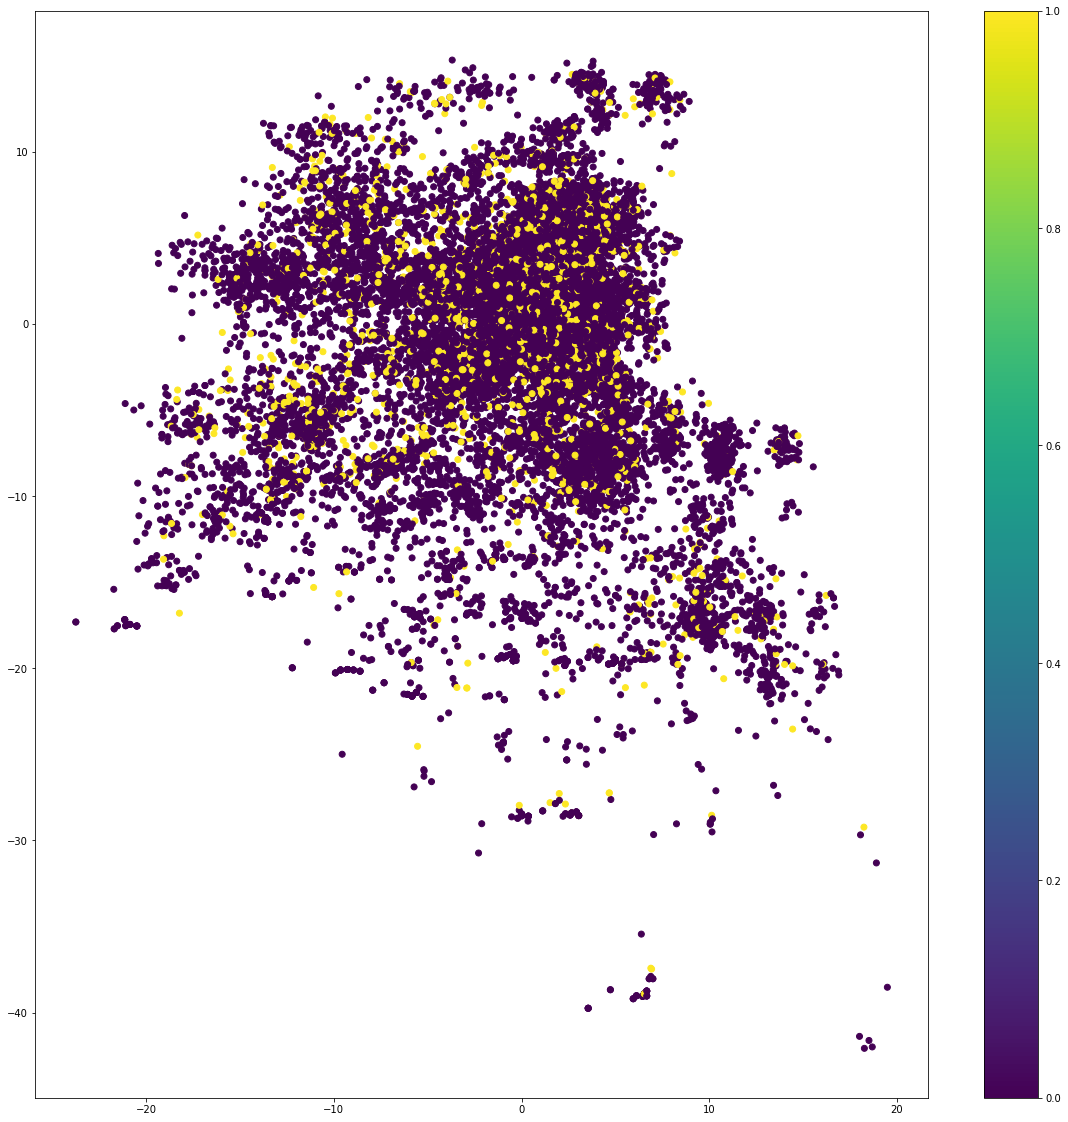

In [186]:
# build a model to project inputs on the latent space
encoder = Model(x, z_mean)
 
# display a 2D plot of the digit classes in the latent space
x_test_encoded = encoder.predict(X_test, batch_size=batch_size)
plt.figure(figsize=(20, 20))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=Y_test)
plt.colorbar()
plt.show()
 
# build a digit generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)